# A Computational Exploration of the Numerical Range

(C) 2021 Andreas Kloeckner

<details>
<summary>MIT License</summary>
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
    
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</details>

The *numerical range* (also called the *field of values*) of a matrix is the set of values that the Rayleigh "quotient" can assume for vectors of 2-norm 1:

$$\let\b=\boldsymbol\{\b x^H A \b x: \|\b x\|_2=1\}$$

$\b x^H$ denotes the complex conjugate transpose of $\b x$.

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

Generate a random $3\times 3$ matrix and a big bunch of random, complex vectors with 2-norm 1:

In [21]:
n = 3
np.random.seed(18)
A = np.random.randn(n, n)
X = np.random.randn(n, 200000) + 1j* np.random.randn(n, 200000)
X = X/la.norm(X, 2, axis=0)

In the following plot, the eigenvalues are orange dots, the norm is represented by the black circle. As you can see, it's quite easy to manufacture vectors that produce Rayleigh "quotients" bigger than the spectral radius. (but not bigger than the norm!)

(-2.521459576466905, 2.521459576466905)

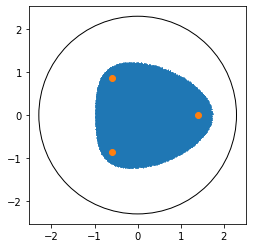

In [22]:
evals = la.eigvals(A)
fov = np.einsum("ip,ij,jp->p", X.conj(), A, X)

nrm = la.norm(A, 2)
plt.gca().set_aspect("equal")
plt.plot(fov.real, fov.imag, "+")
plt.plot(evals.real, evals.imag, "o")
plt.gca().add_artist(plt.Circle(( 0 , 0), nrm, fill=None)) 
plt.xlim([-nrm*1.1, nrm*1.1])
plt.ylim([-nrm*1.1, nrm*1.1])

In [11]:
np.max(np.abs(evals))

0.9484815642798575

In [12]:
la.norm(A, 2)

2.293541482156764